In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt


In [2]:
nparray = np.array([1, 2, 3])
t = torch.from_numpy(nparray)
zeros_tensor = torch.zeros(3, 3)

In [3]:
print(t)
print(t.shape)
print(t.dtype)
print(t.device)
print(zeros_tensor)

tensor([1, 2, 3])
torch.Size([3])
torch.int64
cpu
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


Create your own dataset in a PyTorch tensor

In [11]:
def lin(x, m, b):
  return m * x + b

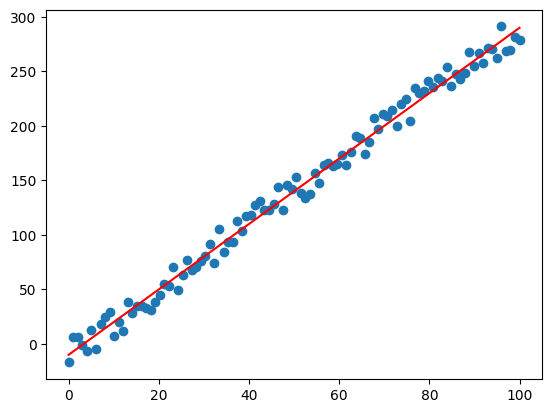

In [17]:
train_n = 100
test_n = 10
m, b = 3, -10
train_x =  np.linspace(0, 100, num=train_n)
train_y = lin(train_x, m, b) 
train_noise_y = train_y + (np.random.rand(train_n) - 0.5) * 30

test_x = np.linspace(0, 100, num=test_n)
test_y = lin(test_x, m, b) 
test_noise_y = test_y + (np.random.rand(test_n) - 0.5) * 30 

train_x = torch.from_numpy(train_x)
train_noise_y = torch.from_numpy(train_noise_y)
test_x = torch.from_numpy(test_x)
test_noise_y = torch.from_numpy(test_noise_y)

plt.scatter(train_x, train_noise_y)
plt.plot(train_x, train_y, 'r')
plt.show()


Create your own dataset in a PyTorch tensor

In [17]:
import torchvision

In [18]:
training_data = torchvision.datasets.MNIST(root='.', train=True, download=False, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root='.', train=False, download=False, transform=torchvision.transforms.ToTensor())

In [3]:
from torch.utils.data import DataLoader

In [19]:
load_train = DataLoader(training_data, batch_size=64, shuffle=True)
load_test = DataLoader(test_data, batch_size=64, shuffle=True)

How to define classes

In [2]:
from torch import nn

In [21]:
class NewModel(nn.Module):
  def __init__(self):
    super(NewModel, self).__init__()
    self.flatten = nn.Flatten()
    self.linear = nn.Sequential(nn.Linear(28*28, 512), nn.ReLU(),)

  def forward(self, x):
    x = self.flatten(x)
    out = self.linear(x)  
    return out

How to train the model

In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
newModel = NewModel()

In [44]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(newModel.parameters(), lr=0.001)

In [45]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (x, y) in enumerate(dataloader):
    pred = model(x)
    loss = loss_fn(pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (batch + 1) % 10 == 0:
      print(f'Step: [{batch+1}/{size}], Loss: {loss.item():.4f} ')
    

In [46]:
epochs = 5
for t in range(epochs):
  print(f'Epoch {t + 1} \n-----------------------')
  train(load_train, newModel,  loss_function, optimizer)
print('Done!')  

Epoch 1 
-----------------------


Step: [10/60000], Loss: 6.2102 
Step: [20/60000], Loss: 6.1704 
Step: [30/60000], Loss: 6.1313 
Step: [40/60000], Loss: 6.1713 
Step: [50/60000], Loss: 6.1101 
Step: [60/60000], Loss: 6.0454 
Step: [70/60000], Loss: 6.0514 
Step: [80/60000], Loss: 5.9643 
Step: [90/60000], Loss: 5.9529 
Step: [100/60000], Loss: 5.8466 
Step: [110/60000], Loss: 5.8134 
Step: [120/60000], Loss: 5.8346 
Step: [130/60000], Loss: 5.8262 
Step: [140/60000], Loss: 5.7618 
Step: [150/60000], Loss: 5.7693 
Step: [160/60000], Loss: 5.7423 
Step: [170/60000], Loss: 5.5869 
Step: [180/60000], Loss: 5.6047 
Step: [190/60000], Loss: 5.5863 
Step: [200/60000], Loss: 5.5481 
Step: [210/60000], Loss: 5.4799 
Step: [220/60000], Loss: 5.4827 
Step: [230/60000], Loss: 5.3984 
Step: [240/60000], Loss: 5.3091 
Step: [250/60000], Loss: 5.3167 
Step: [260/60000], Loss: 5.2801 
Step: [270/60000], Loss: 5.2407 
Step: [280/60000], Loss: 5.2376 
Step: [290/60000], Loss: 5.1414 
Step: [300/60000], Loss: 5.1287 
Step: [310/60000], 

In [48]:
PATH = '.model_1.pth'
torch.save(newModel.state_dict(), PATH)

In [23]:
import pickle
PATH = '.model_1.pth'
model = NewModel()
with open(PATH, "rb") as fp:
  model.load_state_dict(pickle.load(fp))


UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.

In [20]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]
  for images, labels in load_test:
    out_puts = model(images)
    print()

TypeError: 'collections.OrderedDict' object is not callable